# EDA - Tweet Sentimen Tayangan TV Dataset
Exploratory Data Analysis for TV show sentiment tweets dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.feature_extraction.text import CountVectorizer

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

## Load Dataset

In [2]:
df = pd.read_csv("./dataset_tweet_sentimen_tayangan_tv.csv")
print(f"  Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"  Columns: {list(df.columns)}")
df.head()

  Shape: 400 rows × 5 columns
  Columns: ['Id', 'Sentiment', 'Acara TV', 'Jumlah Retweet', 'Text Tweet']


,Id,Sentiment,Acara TV,Jumlah Retweet,Text Tweet
0,1,positive,HitamPutihTransTV,12,"Undang @N_ShaniJKT48 ke hitamputih, pemenang S..."
1,2,positive,HitamPutihTransTV,6,Selamat berbuka puasa Semoga amal ibadah hari ...
2,3,positive,HitamPutihTransTV,9,"Ada nih di trans7 hitam putih, dia dpt penghar..."
3,4,positive,HitamPutihTransTV,2,selamat ya mas @adietaufan masuk hitamputih
4,5,positive,HitamPutihTransTV,1,Asiknya nonton Hitam Putih Trans7


## Dataset Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              400 non-null    int64 
 1   Sentiment       400 non-null    object
 2   Acara TV        400 non-null    object
 3   Jumlah Retweet  400 non-null    int64 
 4   Text Tweet      400 non-null    object
dtypes: int64(2), object(3)
memory usage: 15.8+ KB


In [4]:
df.describe()

,Id,Jumlah Retweet
count,400.000000,400.000000
mean,200.500000,3.582500
std,115.614301,4.875204
min,1.000000,0.000000
25%,100.750000,0.000000
50%,200.500000,2.000000
75%,300.250000,5.000000
max,400.000000,19.000000


## Sentiment Distribution

In [5]:
print("Sentiment value counts:")
print(df['Sentiment'].value_counts())
print("\nSentiment percentage:")
print(df['Sentiment'].value_counts(normalize=True) * 100)

Sentiment value counts:
Sentiment
positive    200
negative    200
Name: count, dtype: int64

Sentiment percentage:
Sentiment
positive    50.0
negative    50.0
Name: proportion, dtype: float64


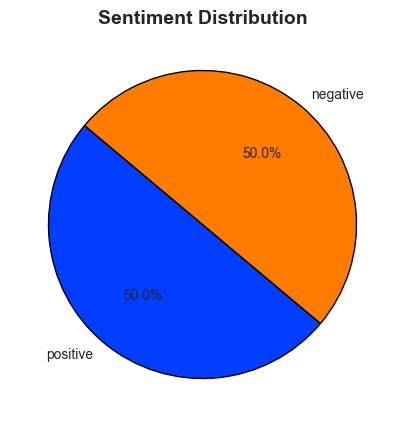

In [6]:
colors = sns.color_palette("bright", n_colors=len(df['Sentiment'].unique()))

plt.figure(figsize=(5, 5))
plt.pie(df['Sentiment'].value_counts(), 
        labels=df['Sentiment'].value_counts().index, 
        autopct='%1.1f%%', 
        colors=colors, 
        startangle=140, 
        wedgeprops={'edgecolor': 'black'})
    
plt.title("Sentiment Distribution", fontsize=14, fontweight='bold')
plt.show()

## Text Analysis

In [10]:
print("Missing values:")
print(df.isnull().sum())
print("\nEmpty strings:")
df['Text Tweet'] = df['Text Tweet'].fillna('')
print(df[df['Text Tweet'] == ''].count())

Missing values:
Id                0
Sentiment         0
Acara TV          0
Jumlah Retweet    0
Text Tweet        0
dtype: int64

Empty strings:
Id                0
Sentiment         0
Acara TV          0
Jumlah Retweet    0
Text Tweet        0
dtype: int64


In [11]:
df.dropna(subset=['Text Tweet'], inplace=True)
df = df[df['Text Tweet'] != ''].copy()
print(f"Dataset shape after cleaning: {df.shape}")

Dataset shape after cleaning: (400, 5)


## Text Length Analysis

In [12]:
df['length'] = df['Text Tweet'].str.len()
df.head(5)

,Id,Sentiment,Acara TV,Jumlah Retweet,Text Tweet,length
0,1,positive,HitamPutihTransTV,12,"Undang @N_ShaniJKT48 ke hitamputih, pemenang S...",115
1,2,positive,HitamPutihTransTV,6,Selamat berbuka puasa Semoga amal ibadah hari ...,75
2,3,positive,HitamPutihTransTV,9,"Ada nih di trans7 hitam putih, dia dpt penghar...",79
3,4,positive,HitamPutihTransTV,2,selamat ya mas @adietaufan masuk hitamputih,43
4,5,positive,HitamPutihTransTV,1,Asiknya nonton Hitam Putih Trans7,33


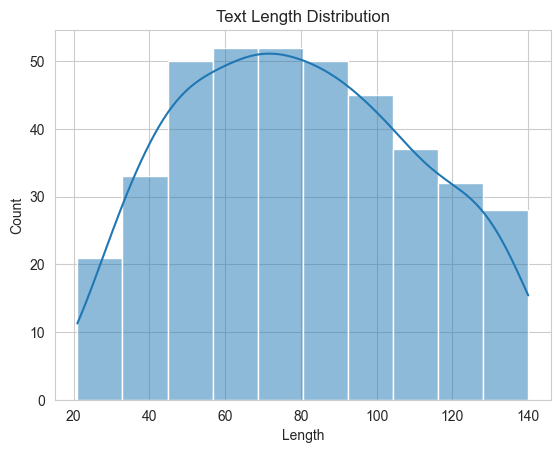

In [13]:
sns.histplot(df['length'], kde=True)
plt.xlabel('Length')
plt.title('Text Length Distribution')
plt.show()

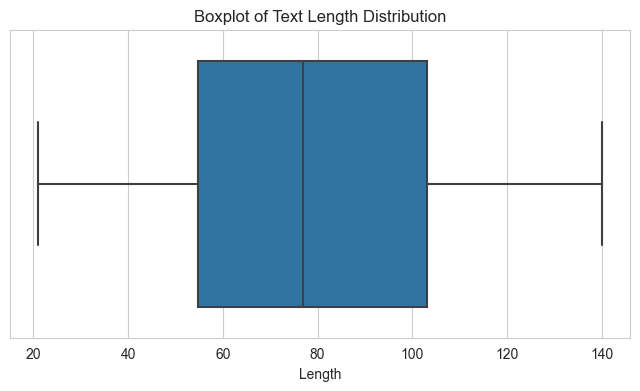

In [14]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['length'])
plt.xlabel('Length')
plt.title('Boxplot of Text Length Distribution')
plt.show()

In [15]:
length = df['length']
print(f"Mean: {length.mean():.2f}")
print(f"Median: {length.median():.2f}")
print(f"Std Dev: {length.std():.2f}")
print(f"Min: {length.min()}")
print(f"Max: {length.max()}")
print(f"\nTexts shorter than 20 characters: {df[df['length'] < 20].shape[0]}")

Mean: 79.89
Median: 77.00
Std Dev: 30.70
Min: 21
Max: 140

Texts shorter than 20 characters: 0


## Text Length by Sentiment

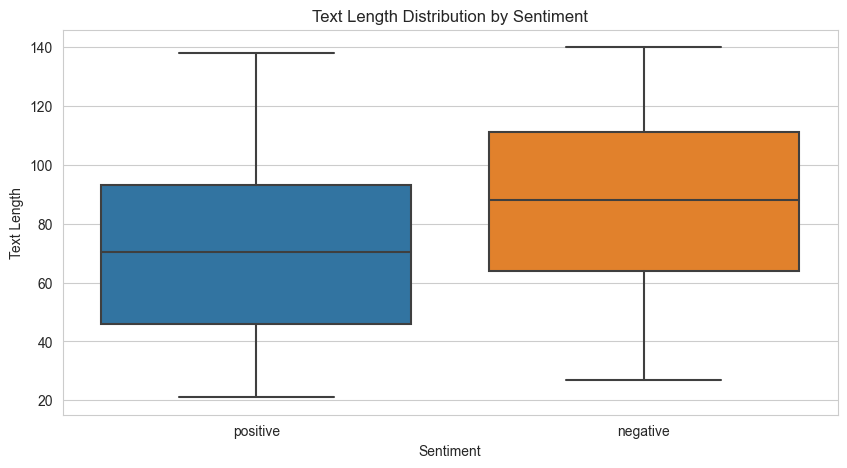

In [16]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Sentiment', y='length', data=df)
plt.title('Text Length Distribution by Sentiment')
plt.ylabel('Text Length')
plt.show()

## N-gram Analysis

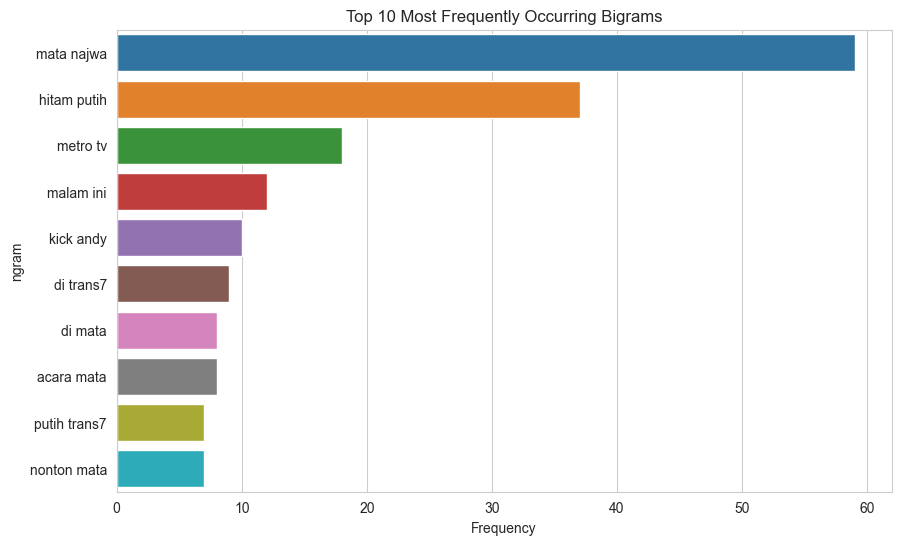

In [17]:
# bigram
cv = CountVectorizer(ngram_range=(2,2), max_features=100)
bigrams = cv.fit_transform(df['Text Tweet'])

count_values = bigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse=True))
ngram_freq.columns = ["frequency", "ngram"]

plt.figure(figsize=(10, 6))
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occurring Bigrams')
plt.xlabel('Frequency')
plt.show()

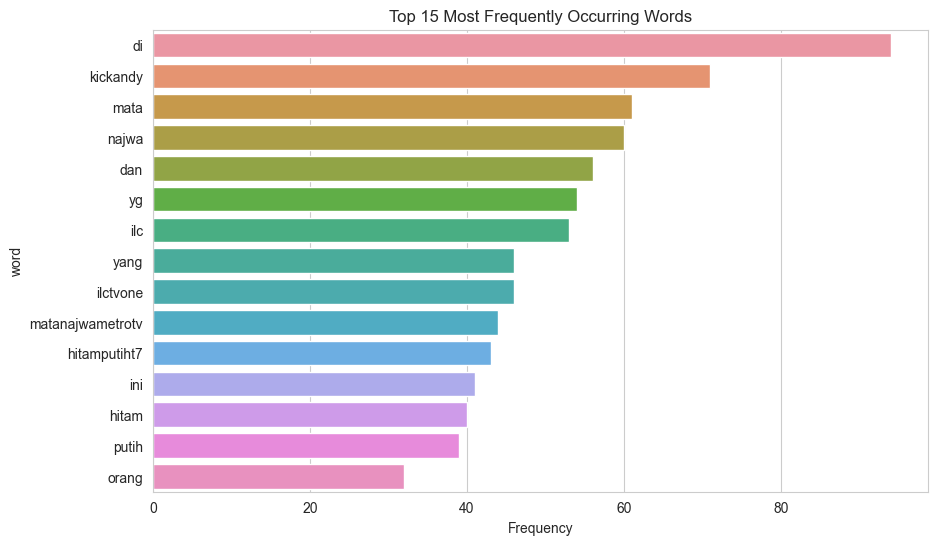

In [18]:
# unigram
cv_unigram = CountVectorizer(ngram_range=(1,1), max_features=100)
unigrams = cv_unigram.fit_transform(df['Text Tweet'])

count_values_uni = unigrams.toarray().sum(axis=0)
unigram_freq = pd.DataFrame(sorted([(count_values_uni[i], k) for k, i in cv_unigram.vocabulary_.items()], reverse=True))
unigram_freq.columns = ["frequency", "word"]

plt.figure(figsize=(10, 6))
sns.barplot(x=unigram_freq['frequency'][:15], y=unigram_freq['word'][:15])
plt.title('Top 15 Most Frequently Occurring Words')
plt.xlabel('Frequency')
plt.show()

## N-gram Analysis by Sentiment

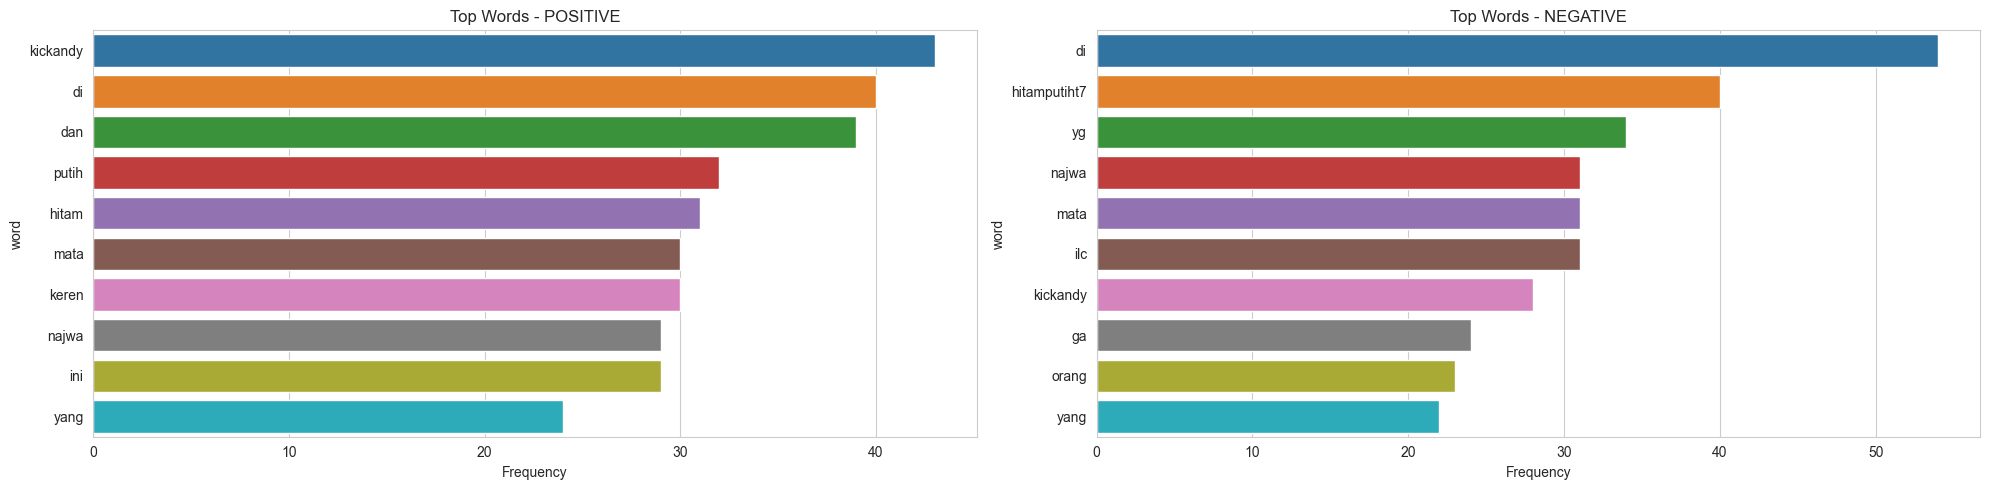

In [20]:
# top words per sentiment
sentiments = df['Sentiment'].unique()

fig, axes = plt.subplots(1, len(sentiments), figsize=(20, 5))
if len(sentiments) == 1:
    axes = [axes]

for idx, sentiment in enumerate(sentiments):
    sentiment_texts = df[df['Sentiment'] == sentiment]['Text Tweet']
    
    cv_sent = CountVectorizer(ngram_range=(1,1), max_features=50)
    words_sent = cv_sent.fit_transform(sentiment_texts)
    
    count_vals = words_sent.toarray().sum(axis=0)
    word_freq = pd.DataFrame(sorted([(count_vals[i], k) for k, i in cv_sent.vocabulary_.items()], reverse=True))
    word_freq.columns = ["frequency", "word"]
    
    sns.barplot(x=word_freq['frequency'][:10], y=word_freq['word'][:10], ax=axes[idx])
    axes[idx].set_title(f'Top Words - {sentiment.upper()}')
    axes[idx].set_xlabel('Frequency')

plt.tight_layout()
plt.show()

## Summary Statistics

In [19]:
print("=" * 50)
print("DATASET SUMMARY")
print("=" * 50)
print(f"Total samples: {len(df)}")
print(f"\nSentiment distribution:")
for sentiment, count in df['Sentiment'].value_counts().items():
    percentage = (count / len(df)) * 100
    print(f"  {sentiment}: {count} ({percentage:.2f}%)")
print(f"\nTV Shows: {df['Acara TV'].nunique()} unique shows")
print(f"\nRetweet statistics:")
print(f"  Average retweets: {df['Jumlah Retweet'].mean():.2f}")
print(f"  Median retweets: {df['Jumlah Retweet'].median():.2f}")
print(f"\nText length statistics:")
print(f"  Average length: {df['length'].mean():.2f} characters")
print(f"  Median length: {df['length'].median():.2f} characters")
print("=" * 50)

DATASET SUMMARY
Total samples: 400

Sentiment distribution:
  positive: 200 (50.00%)
  negative: 200 (50.00%)

TV Shows: 4 unique shows

Retweet statistics:
  Average retweets: 3.58
  Median retweets: 2.00

Text length statistics:
  Average length: 79.89 characters
  Median length: 77.00 characters


In [ ]:
# top words per sentiment
sentiments = df['Sentiment'].unique()

fig, axes = plt.subplots(1, len(sentiments), figsize=(20, 5))
if len(sentiments) == 1:
    axes = [axes]

for idx, sentiment in enumerate(sentiments):
    sentiment_texts = df[df['Sentiment'] == sentiment]['Text Tweet']
    
    cv_sent = CountVectorizer(ngram_range=(1,1), max_features=50)
    words_sent = cv_sent.fit_transform(sentiment_texts)
    
    count_vals = words_sent.toarray().sum(axis=0)
    word_freq = pd.DataFrame(sorted([(count_vals[i], k) for k, i in cv_sent.vocabulary_.items()], reverse=True))
    word_freq.columns = ["frequency", "word"]
    
    sns.barplot(x=word_freq['frequency'][:10], y=word_freq['word'][:10], ax=axes[idx])
    axes[idx].set_title(f'Top Words - {sentiment.upper()}')
    axes[idx].set_xlabel('Frequency')

plt.tight_layout()
plt.show()